In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import pandas as pd
import numpy as np
import re
import json

%matplotlib inline

In [13]:
def get_id(index_url):
    return re.findall(r'(\d+)',str(index_url))[0]

In [14]:
with open('../data/all_books_per_category_saved.json') as f:
    books_dict = json.load(f)

In [15]:
all_books = []

for f_name in glob('../data/*/*.json'):
    with open(str(f_name)) as f:
        try:
            all_books.append(json.load(f))
        except:
            print(str(f_name), " failed to load.")

In [16]:
len(all_books)

251

In [17]:
df = pd.DataFrame(all_books)

In [18]:
df.dtypes

author_dd       int64
author_id       int64
author_name    object
book_id         int64
category_id     int64
pages           int64
text           object
dtype: object

In [19]:
df.loc[(df['pages'] == -1) | (df['author_dd'] == -1) | (df['author_id'] == -1) | (df['category_id'] == -1) | (df['book_id'] == -1)]

,author_dd,author_id,author_name,book_id,category_id,pages,text


In [20]:
df['pages'].sum()

477048

In [21]:
df[df['author_dd'] == df['author_id']]

,author_dd,author_id,author_name,book_id,category_id,pages,text


In [22]:
saved = list(df['book_id'])

In [23]:
for x in ['134','135','136','137']:
    for i,book in enumerate(books_dict['/index.php/category/'+x]):
        if int(get_id(book[1])) not in saved:
            print(x, ' - ',i, ' - ', get_id(book[1]))
    print('\n#####\n#####\n#####\n')


#####
#####
#####


#####
#####
#####


#####
#####
#####


#####
#####
#####



In [59]:
def category_names(category_id):
    if category_id == "134":
        return "Ḥanafī"
    elif category_id == "135":
        return "Mālikī"
    elif category_id == "136":
        return "Shāfiʿī"
    elif category_id == "137":
        return "Ḥanbalī"

In [60]:
df['category_id'] = df['category_id'].map(category_names)

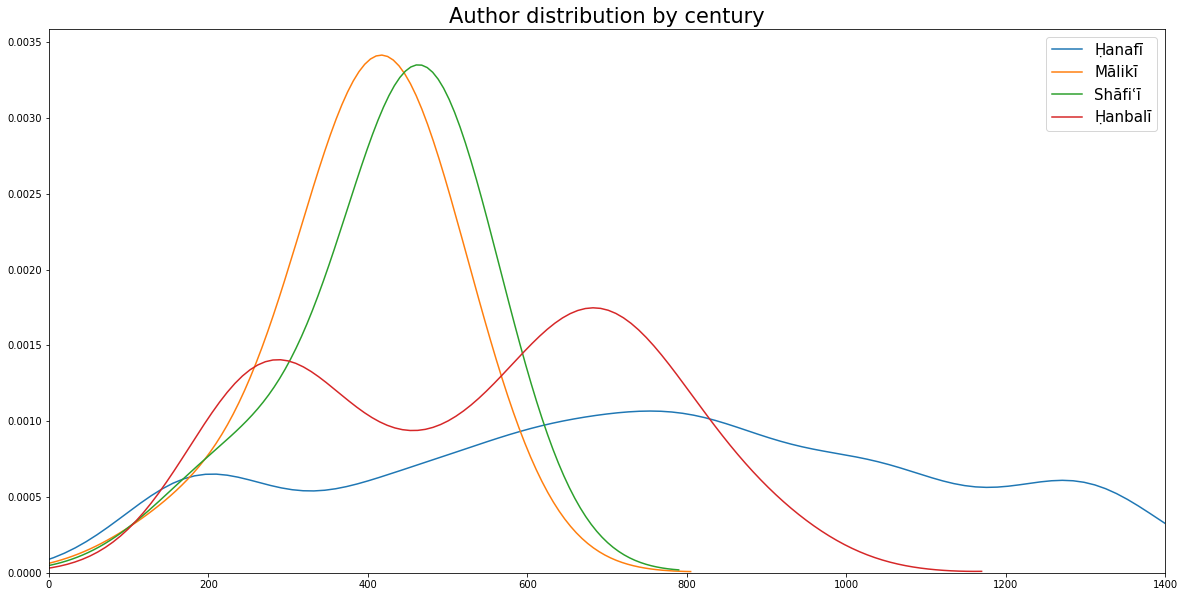

In [11]:
f,ax = plt.subplots(figsize=(20,10))

sns.kdeplot(df[df['category_id'] == 134]['author_dd'], bw=95, label="Ḥanafī", ax=ax);
sns.kdeplot(df[df['category_id'] == 135]['author_dd'], bw=95, label="Mālikī", ax=ax);
sns.kdeplot(df[df['category_id'] == 136]['author_dd'], bw=95, label="Shāfiʿī", ax=ax);
sns.kdeplot(df[df['category_id'] == 137]['author_dd'], bw=95, label="Ḥanbalī", ax=ax);

ax.set(xlim=(0, 1400));
ax.legend(fontsize=15)
ax.set_title("Author distribution by century", fontsize=21);

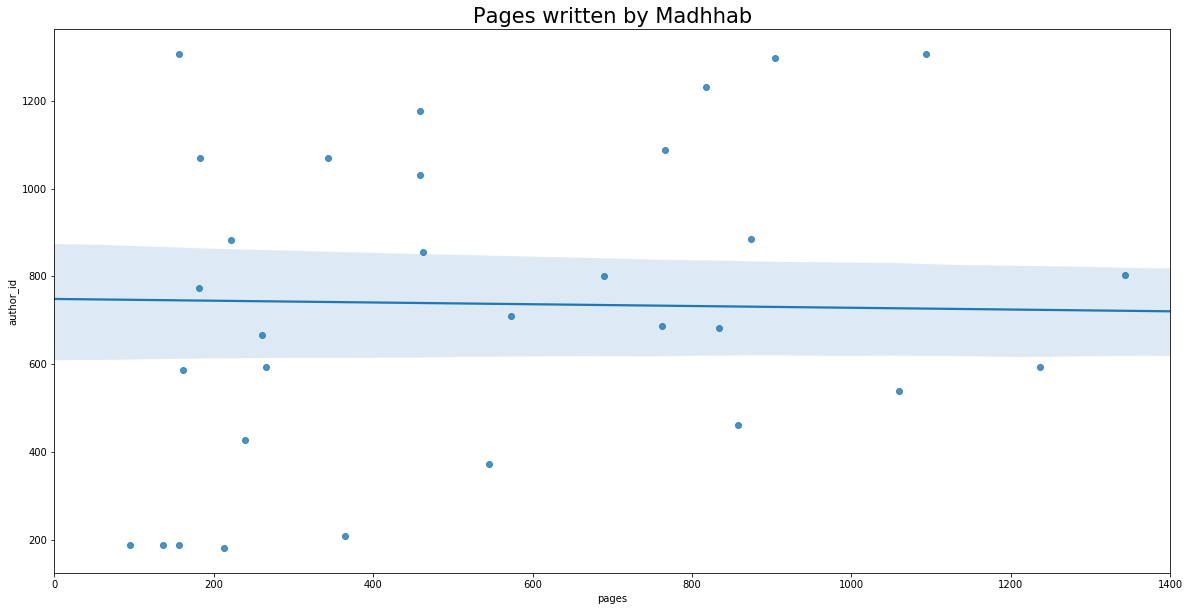

In [28]:
f,ax = plt.subplots(figsize=(20,10))

sns.regplot(df[df['category_id'] == 134]['pages'], df[df['category_id'] == 134]['author_id'], label="Ḥanafī", ax=ax);
# sns.barplot(df[df['category_id'] == 135]['pages'], label="Mālikī", ax=ax);
# sns.barplot(df[df['category_id'] == 136]['pages'], label="Shāfiʿī", ax=ax);
# sns.barplot(df[df['category_id'] == 137]['pages'], label="Ḥanbalī", ax=ax);

ax.set(xlim=(0, 1400));
ax.set_title("Pages written by Madhhab", fontsize=21);

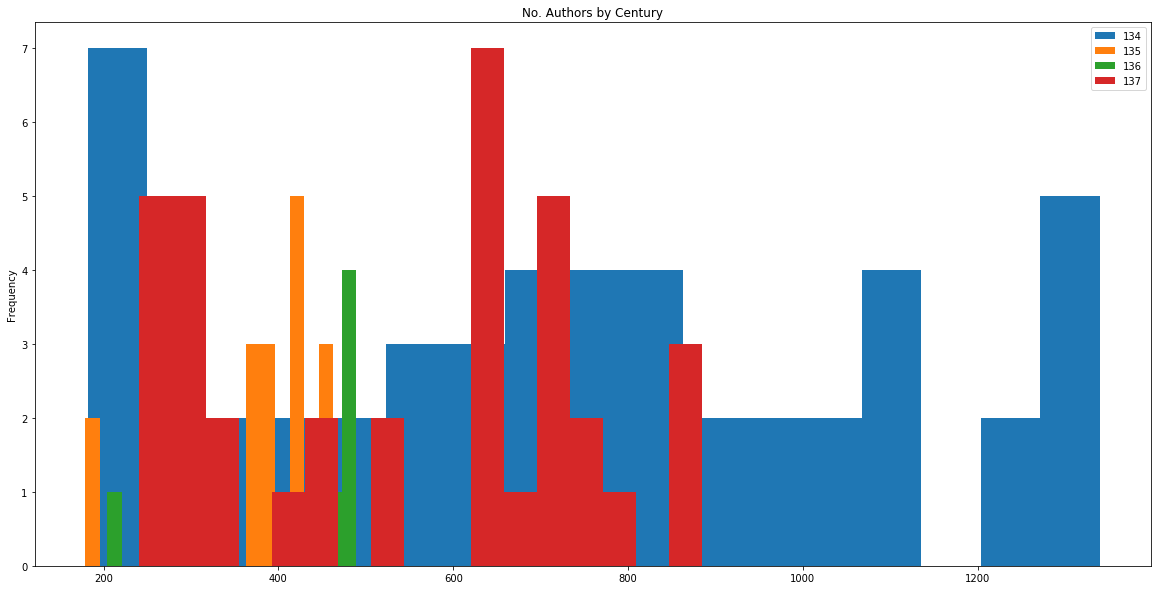

In [35]:
df.groupby('category_id')['author_dd'].plot(kind='hist', bins=17, stacked=True, figsize=(20,10), title="No. Authors by Century", legend=True);

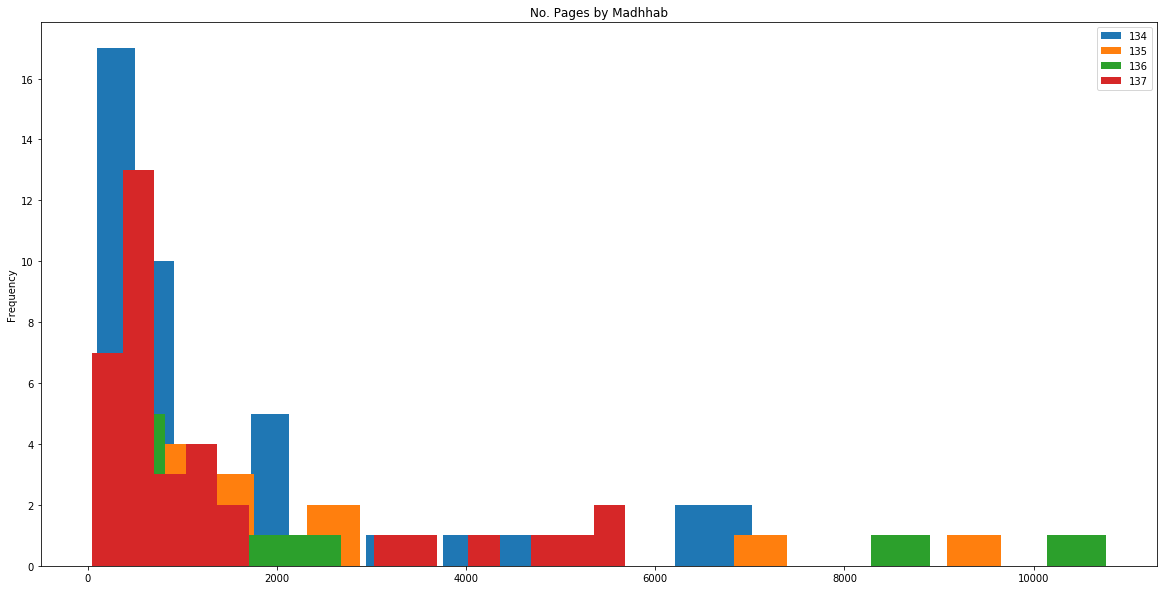

In [36]:
df.groupby('category_id')['pages'].plot(kind='hist', bins=17, stacked=True, figsize=(20,10), title="No. Pages by Madhhab", legend=True);

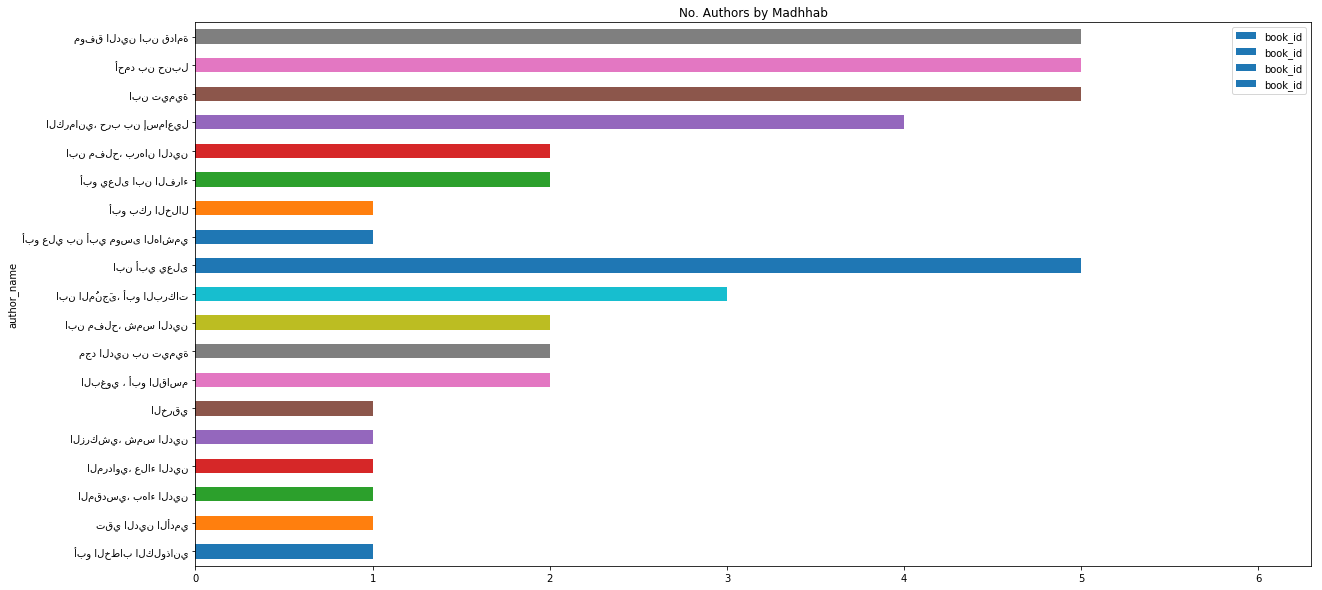

In [67]:
df[df['category_id'] == 134].groupby(['author_name'])['book_id'].count().sort_values().plot(kind='barh', stacked=True, figsize=(20,10), title="No. Authors by Madhhab", legend=True);
df[df['category_id'] == 135].groupby(['author_name'])['book_id'].count().sort_values().plot(kind='barh', stacked=True, figsize=(20,10), title="No. Authors by Madhhab", legend=True);
df[df['category_id'] == 136].groupby(['author_name'])['book_id'].count().sort_values().plot(kind='barh', stacked=True, figsize=(20,10), title="No. Authors by Madhhab", legend=True);
df[df['category_id'] == 137].groupby(['author_name'])['book_id'].count().sort_values().plot(kind='barh', stacked=True, figsize=(20,10), title="No. Authors by Madhhab", legend=True);

In [ ]:
df.groupby('category_id')['author_id'].count().plot(kind='barh', figsize=(20,10), title="No. Authors by Madhhab", legend=True);

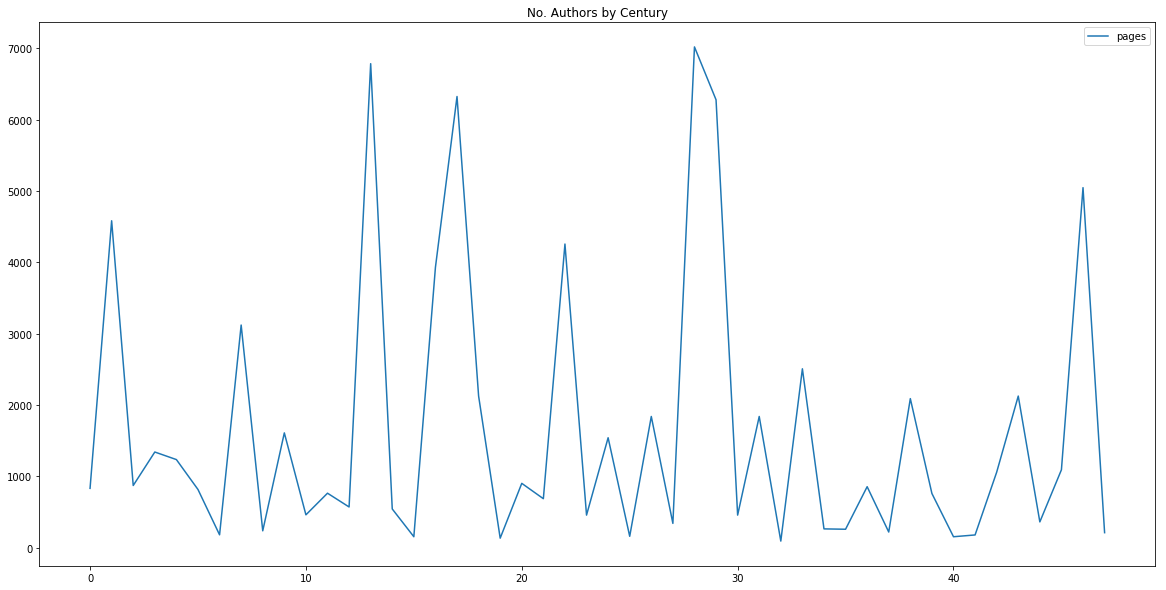

In [39]:
df[df['category_id'] == 134]['pages'].T.plot(kind='line',figsize=(20,10), title="No. Authors by Century", legend=True);
# df[df['category_id'] == 135]['author_dd'].plot(kind='line',figsize=(20,10), title="No. Authors by Century", legend=True)
# df[df['category_id'] == 136]['author_dd'].plot(kind='line',figsize=(20,10), title="No. Authors by Century", legend=True)
# df[df['category_id'] == 137]['author_dd'].plot(kind='line',figsize=(20,10), title="No. Authors by Century", legend=True)

In [ ]:
# messed up files, need to re scrape
# 11262
# 37545

In [ ]:
for index_url in ['21525','2186','21848']:
    print(time.time())
    get_book_text(category_url, index_url)

In [34]:
for i,book in enumerate(books_dict['/index.php/category/137'][59:60]):
    print(i, ' - ', get_id(book[1]))
for i,book in enumerate(books_dict['/index.php/category/137'][65:66]):
    print(i, ' - ', get_id(book[1]))

0  -  21677
0  -  10649


In [25]:
import time
import sys

In [26]:
for i,book in enumerate(books_dict['/index.php/category/134'][29:]):
    sys.stdout.write("Download progress: %d%%   \r" % (i) )
    sys.stdout.flush()

In [35]:
for i,book in enumerate(books_dict['/index.php/category/137'][38:]):
    print(i, ' - ', book[1])

0  -  /index.php/book/21609
1  -  /index.php/book/19228
2  -  /index.php/book/7360
3  -  /index.php/book/11230
4  -  /index.php/book/13664
5  -  /index.php/book/11196
6  -  /index.php/book/1679
7  -  /index.php/book/6538
8  -  /index.php/book/21693
9  -  /index.php/book/14386
10  -  /index.php/book/21642
11  -  /index.php/book/6084
12  -  /index.php/book/16772
13  -  /index.php/book/18353
14  -  /index.php/book/96876
15  -  /index.php/book/14153
16  -  /index.php/book/29796
17  -  /index.php/book/6115
18  -  /index.php/book/7495
19  -  /index.php/book/31246
20  -  /index.php/book/1685
21  -  /index.php/book/21677
22  -  /index.php/book/97809
23  -  /index.php/book/5463
24  -  /index.php/book/29577
25  -  /index.php/book/11263
26  -  /index.php/book/12216
27  -  /index.php/book/10649
28  -  /index.php/book/11192
29  -  /index.php/book/36194
30  -  /index.php/book/37590
31  -  /index.php/book/17500
32  -  /index.php/book/13626
33  -  /index.php/book/13625
34  -  /index.php/book/12899
35 

In [39]:
for i,book in enumerate(books_dict['/index.php/category/137'][::-1]):
    print(i, ' - ', book[1])

0  -  /index.php/book/37545
1  -  /index.php/book/11262
2  -  /index.php/book/16822
3  -  /index.php/book/11811
4  -  /index.php/book/12899
5  -  /index.php/book/13625
6  -  /index.php/book/13626
7  -  /index.php/book/17500
8  -  /index.php/book/37590
9  -  /index.php/book/36194
10  -  /index.php/book/11192
11  -  /index.php/book/10649
12  -  /index.php/book/12216
13  -  /index.php/book/11263
14  -  /index.php/book/29577
15  -  /index.php/book/5463
16  -  /index.php/book/97809
17  -  /index.php/book/21677
18  -  /index.php/book/1685
19  -  /index.php/book/31246
20  -  /index.php/book/7495
21  -  /index.php/book/6115
22  -  /index.php/book/29796
23  -  /index.php/book/14153
24  -  /index.php/book/96876
25  -  /index.php/book/18353
26  -  /index.php/book/16772
27  -  /index.php/book/6084
28  -  /index.php/book/21642
29  -  /index.php/book/14386
30  -  /index.php/book/21693
31  -  /index.php/book/6538
32  -  /index.php/book/1679
33  -  /index.php/book/11196
34  -  /index.php/book/13664
35

In [113]:
df[df['book_id'] == "12853"]

,author_dd,author_id,author_name,book_id,category_id,pages,text


In [37]:
48+66+61+79

254